In [2]:
import pandas as pd

# Loading Airbnb dataset in Excel format
file_path = "/Users/detviler/Downloads/Data Analytics Project/NY_AirBNB_2019.xls"
df = pd.read_excel(file_path)

# Handle missing values - Data Cleaning 
df.dropna(inplace=True)  # Droping rows with missing values

# Handle outliers (assuming 'price' is the column you want to check for outliers)
def remove_outliers(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    data_cleaned = data[abs(z_scores) < threshold]
    return data_cleaned

df = remove_outliers(df, 'price')

# df.fillna(value, inplace=True)

# Save the cleaned dataset using openpyxl engine
cleaned_file_path = "/Users/detviler/Downloads/Data Analytics Project/cleaned_NY_AirBNB_2019.xlsx"
df.to_excel(cleaned_file_path, index=False, engine='openpyxl')


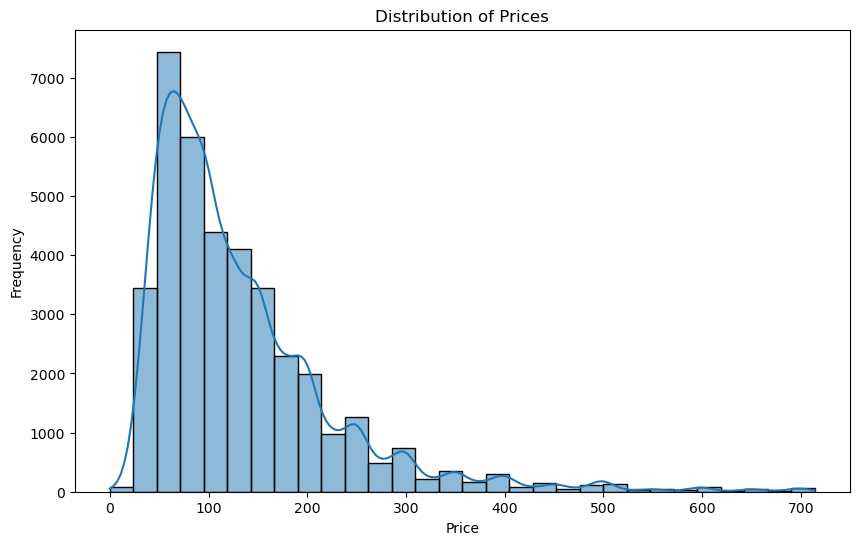

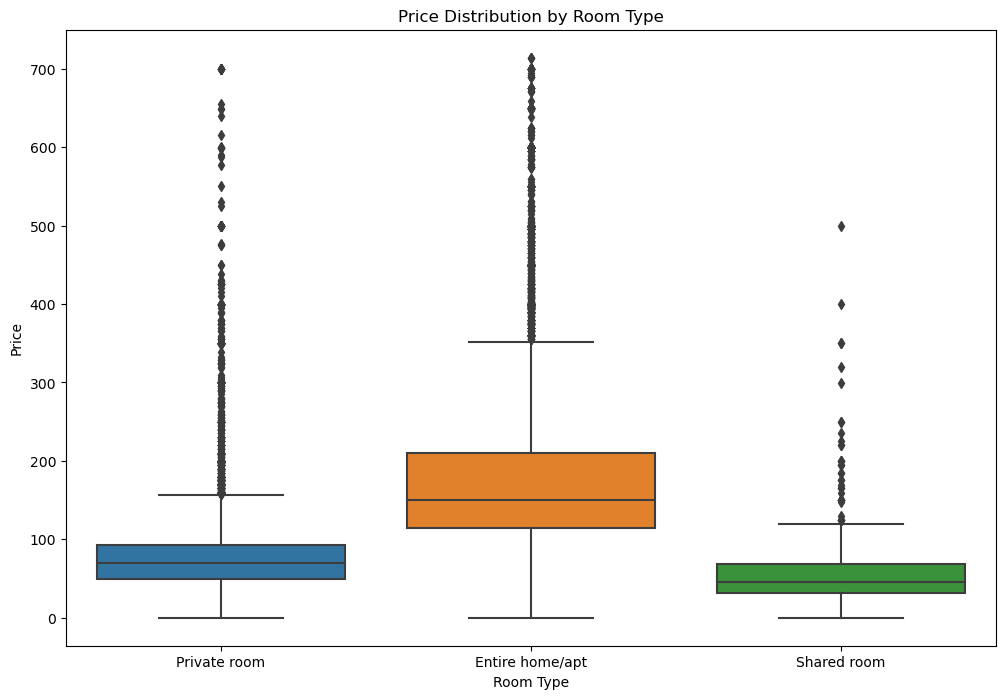

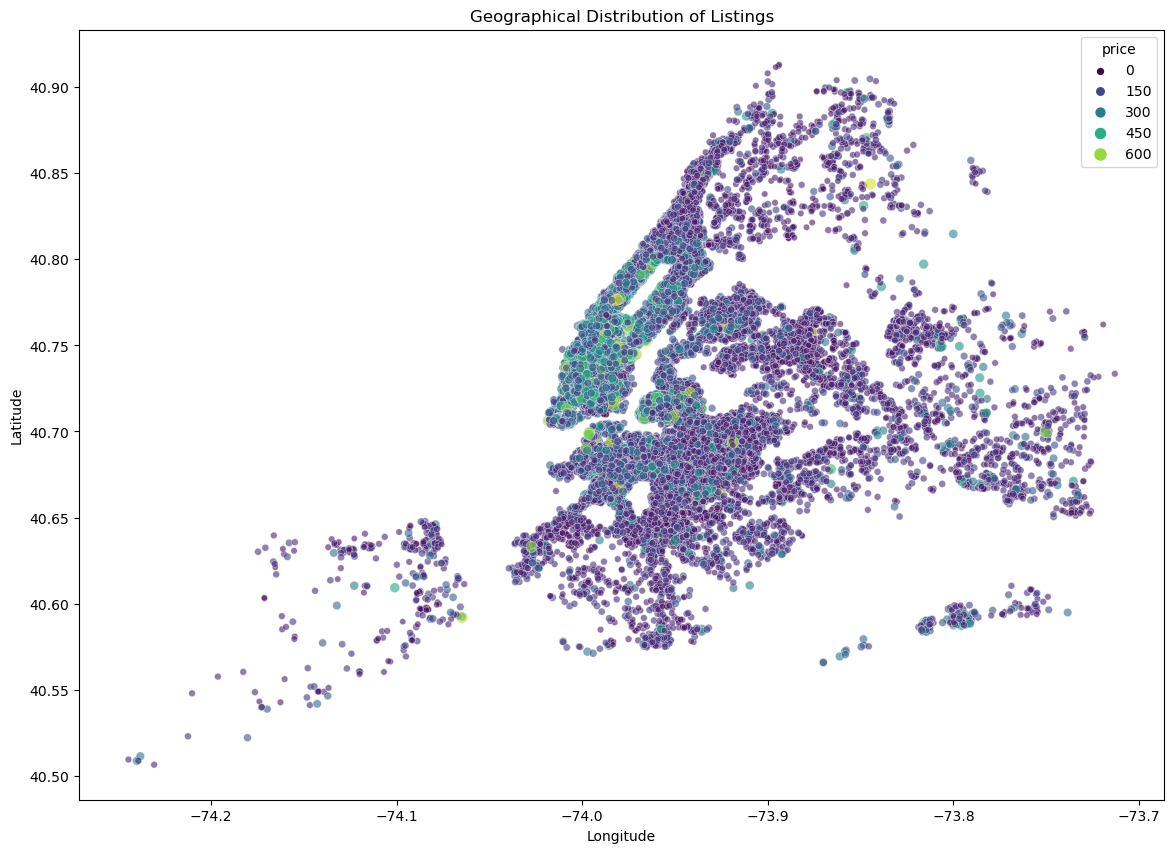

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
cleaned_file_path = "/Users/detviler/Downloads/Data Analytics Project/cleaned_NY_AirBNB_2019.xls"
df = pd.read_excel(cleaned_file_path)

# Basic statistics
summary_stats = df.describe()

# Visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between room type and price
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

# Visualize the geographical distribution of listings
plt.figure(figsize=(14, 10))
sns.scatterplot(x='longitude', y='latitude', hue='price', size='price', data=df, palette='viridis', alpha=0.6)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


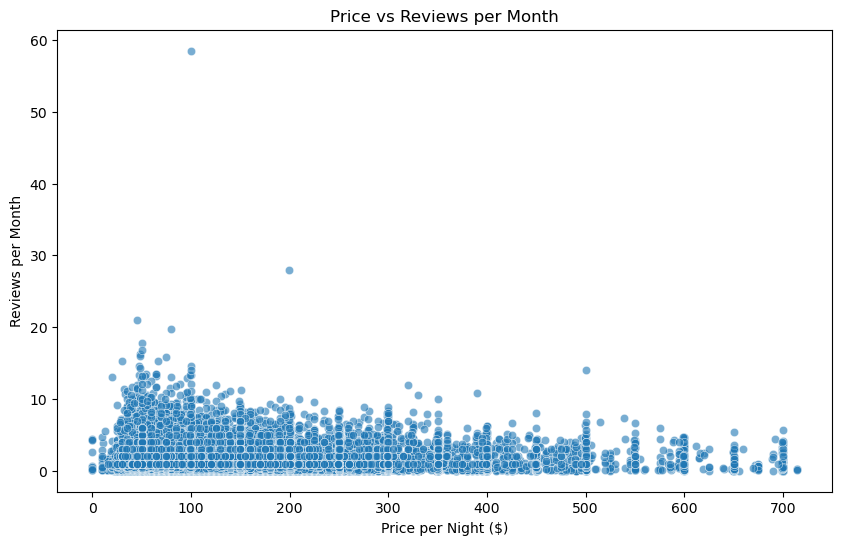

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationship between price and reviews_per_month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews_per_month', data=df, alpha=0.6)
plt.title('Price vs Reviews per Month')
plt.xlabel('Price per Night ($)')
plt.ylabel('Reviews per Month')
plt.show()


In [5]:
correlation = df['price'].corr(df['reviews_per_month'])
print(f"Correlation between price and reviews_per_month: {correlation}")


Correlation between price and reviews_per_month: -0.0262861272420019


# Does certain price ranges attract more reviewes ? 

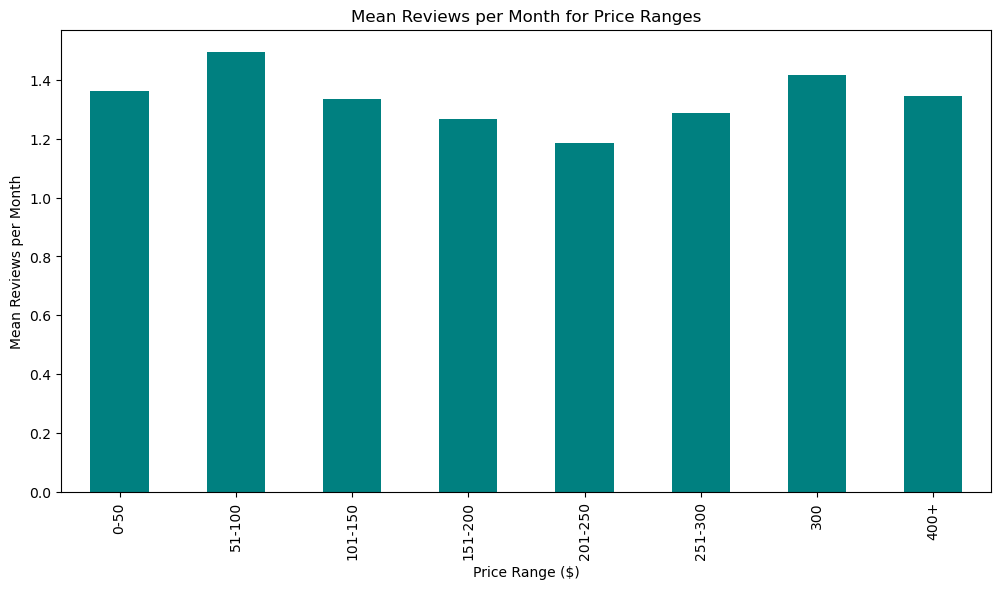

In [14]:
import numpy as np

# Bin prices into categories for a grouped bar plot
bins = [0, 50, 100, 150, 200, 250, 300, 400, np.inf]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '300', '400+']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Calculate the mean reviews_per_month for each price range
mean_reviews_per_price_range = df.groupby('price_range')['reviews_per_month'].mean()

# Plot the grouped bar plot
plt.figure(figsize=(12, 6))
mean_reviews_per_price_range.plot(kind='bar', color='teal')
plt.title('Mean Reviews per Month for Price Ranges')
plt.xlabel('Price Range ($)')
plt.ylabel('Mean Reviews per Month')
plt.show()


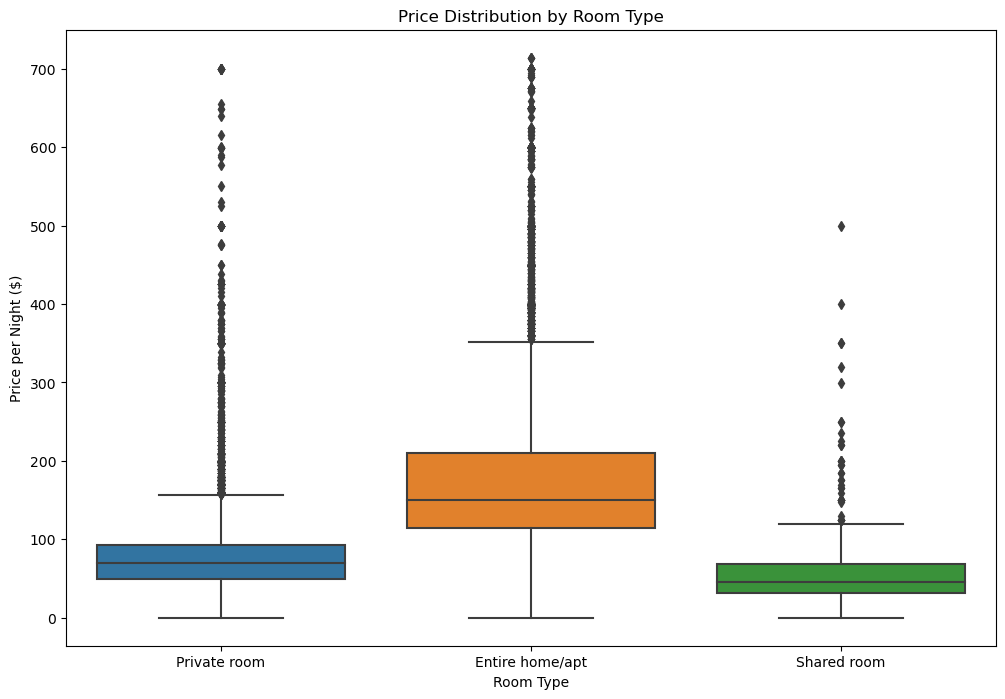

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of prices for each room type using a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price per Night ($)')
plt.show()


In [16]:
from scipy.stats import f_oneway

# Perform ANOVA to test for significant differences in price among room types
room_types = df['room_type'].unique()
anova_results = {}

for room_type in room_types:
    subset = df[df['room_type'] == room_type]['price']
    anova_results[room_type] = subset

f_statistic, p_value = f_oneway(*anova_results.values())

print(f"ANOVA Results - F-statistic: {f_statistic}, p-value: {p_value}")


ANOVA Results - F-statistic: 7802.529307671432, p-value: 0.0


In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(df['price'], df['room_type'])

print(tukey_results)


          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1        group2     meandiff p-adj   lower     upper   reject
-----------------------------------------------------------------------
Entire home/apt Private room -100.5197   0.0 -102.4531  -98.5863   True
Entire home/apt  Shared room -123.5441   0.0  -130.133 -116.9552   True
   Private room  Shared room  -23.0244   0.0  -29.6317  -16.4171   True
-----------------------------------------------------------------------


# Analyzing the impact of neighborhoods on pricing for each category of rooms (Entire home, Private room, Shared room) can provide insights into how location influences the pricing strategy.

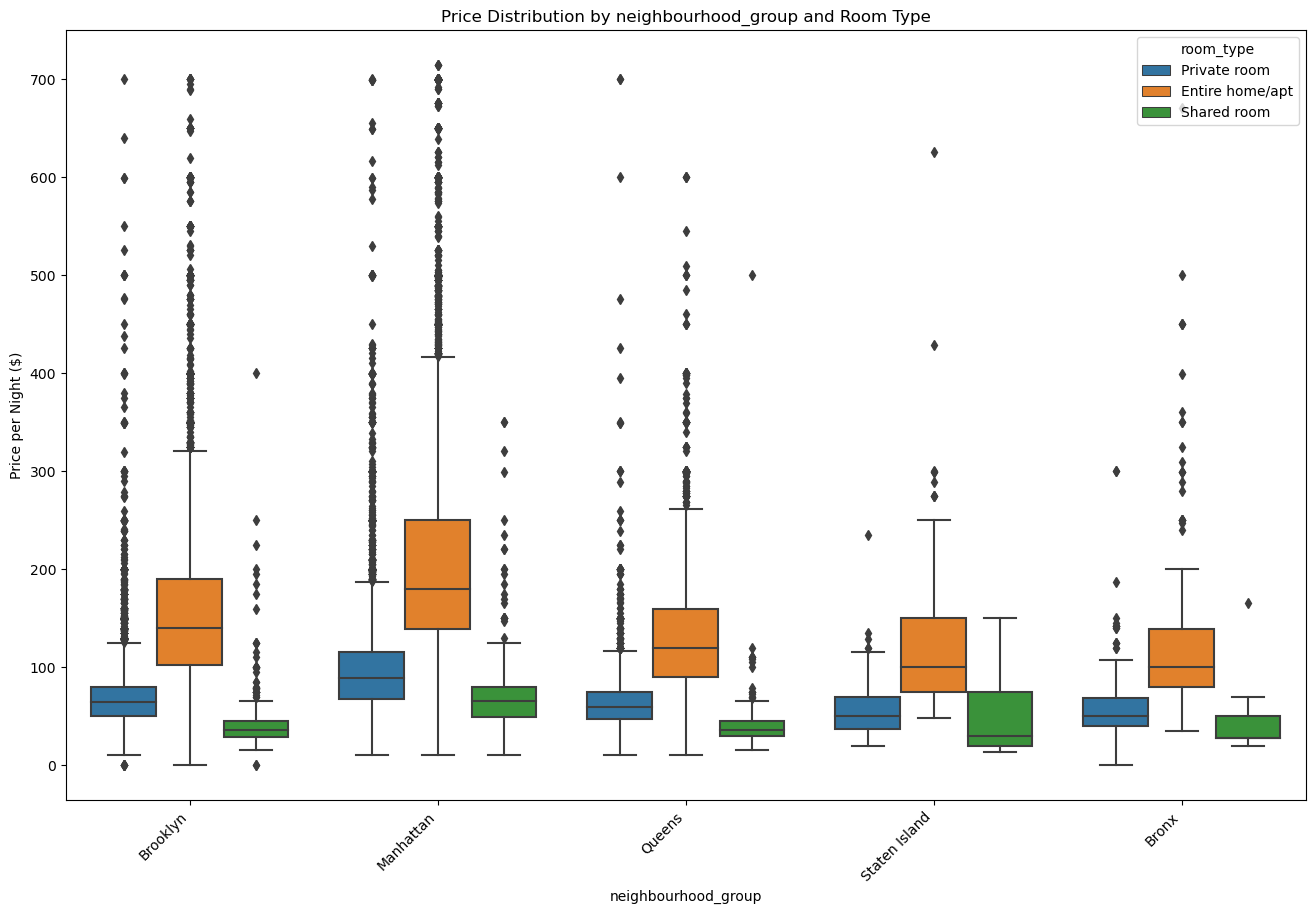

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of prices for each room type in different neighborhoods using box plots
plt.figure(figsize=(16, 10))
sns.boxplot(x='neighbourhood_group', y='price', hue='room_type', data=df)
plt.title('Price Distribution by neighbourhood_group and Room Type')
plt.xlabel('neighbourhood_group')
plt.ylabel('Price per Night ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


Text(120.72222222222221, 0.5, 'Neighborhood')

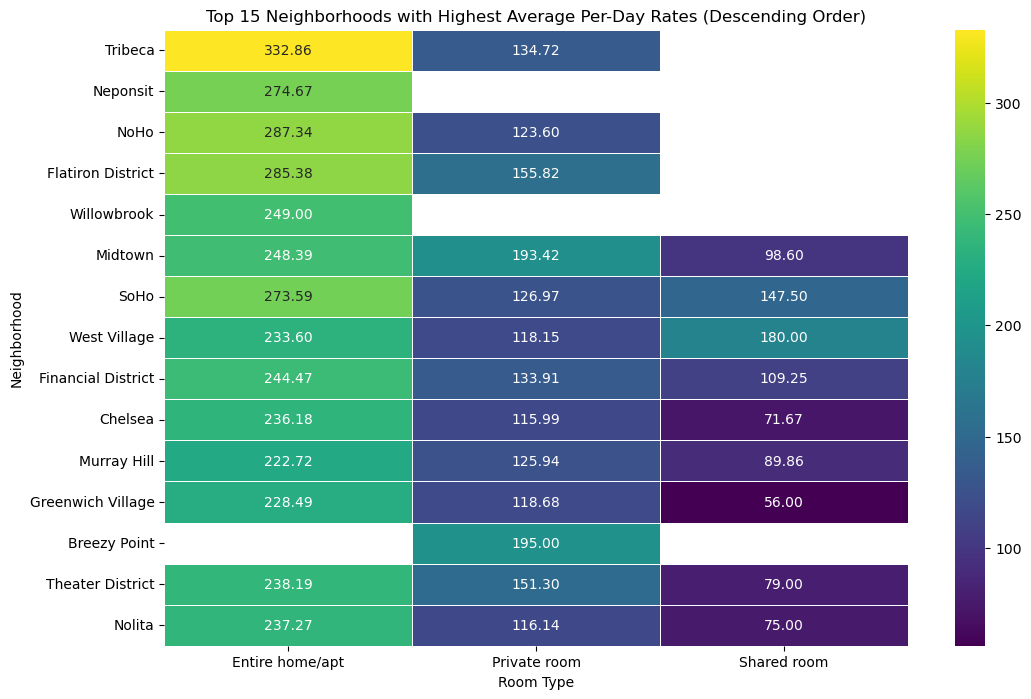

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by neighborhood and calculate the mean price per day
neighborhood_avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Select the top 20 neighborhoods
top_15_neighborhoods = neighborhood_avg_price.head(15).index

# Filter the dataset for these neighborhoods
top_15_df = df[df['neighbourhood'].isin(top_15_neighborhoods)].copy()

# Sort the top neighborhoods by average price in descending order
top_15_df['neighbourhood'] = pd.Categorical(top_15_df['neighbourhood'], categories=top_15_neighborhoods, ordered=True)
top_15_df.sort_values('neighbourhood', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap_data = top_15_df.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Top 15 Neighborhoods with Highest Average Per-Day Rates (Descending Order)')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')


# Top 5 Neighourhood group with highest rates/ night 

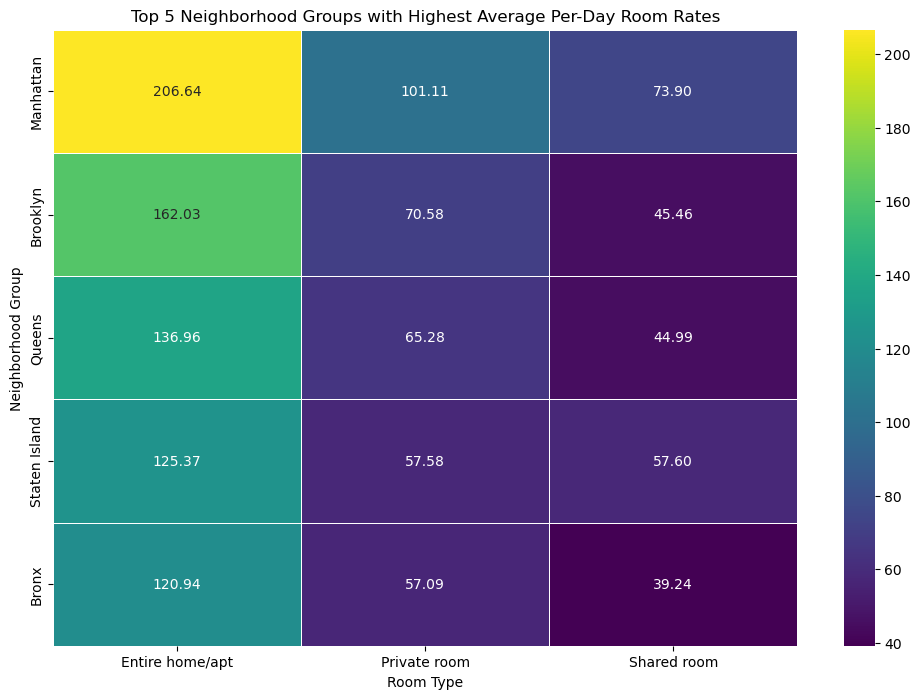

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by neighborhood_group and calculate the mean price per day
neighborhood_group_avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Select the top 5 neighborhood groups
top_5_neighborhood_groups = neighborhood_group_avg_price.head(5).index

# Filter the dataset for these neighborhood groups
top_5_df = df[df['neighbourhood_group'].isin(top_5_neighborhood_groups)]

# Sort the top neighborhood groups by average price in descending order
top_5_df['neighbourhood_group'] = pd.Categorical(top_5_df['neighbourhood_group'], categories=top_5_neighborhood_groups, ordered=True)
top_5_df.sort_values('neighbourhood_group', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap_data = top_5_df.pivot_table(index='neighbourhood_group', columns='room_type', values='price', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Top 5 Neighborhood Groups with Highest Average Per-Day Room Rates')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood Group')
plt.show()


# Cleaning Acitivty 

In [1]:
import pandas as pd

# Load your new Airbnb dataset in Excel format
file_path = "/Users/detviler/Downloads/Data Analytics Project/NY_AirBNB_2019.xls"
df = pd.read_excel(file_path)

# Display basic information about the dataset
print(df.info())

# Handle missing values
df.dropna(inplace=True)  # Drop rows with missing values

# Handle outliers (assuming 'price' is the column you want to check for outliers)
def remove_outliers(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    data_cleaned = data[abs(z_scores) < threshold]
    return data_cleaned

df = remove_outliers(df, 'price')

# Optionally, you can fill missing values instead of dropping them
# df.fillna(value, inplace=True)

# Create a new column 'Days_Occupied' based on 'availability_365'
df['Days_Occupied'] = 365 - df['availability_365']

# Create a new column 'Occupancy_Rate' based on 'Days_Occupied'
df['Occupancy_Rate'] = (df['Days_Occupied'] / 365) * 100

# Save the cleaned dataset
cleaned_file_path = "/Users/detviler/Downloads/Data Analytics Project/cleaned_NY_AirBNB_2019.xls"
df.to_excel(cleaned_file_path, index=False)

# Display basic statistics of the cleaned dataset
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48869 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48873 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

/var/folders/04/rq6qhv8940sdplmt7bwdbt5h0000gn/T/ipykernel_28850/1174768358.py:32: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(cleaned_file_path, index=False)


                 id       host_id      latitude     longitude         price  \
count  2.586600e+04  2.586600e+04  25866.000000  25866.000000  25866.000000   
mean   1.933644e+07  7.468277e+07     40.727391    -73.947433    137.636163   
std    1.121256e+07  8.268650e+07      0.057075      0.051551    101.680987   
min    2.539000e+03  2.571000e+03     40.506410    -74.244420      0.000000   
25%    9.464390e+06  7.385740e+06     40.686903    -73.982160     69.000000   
50%    2.081249e+07  3.532277e+07     40.721450    -73.952780    105.000000   
75%    2.951482e+07  1.316976e+08     40.763078    -73.928940    175.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990    745.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    25866.000000       25866.000000       25866.000000   
mean         6.577901          38.378373           1.818565   
std         19.549521          54.532789           1.809480   
min          1.000000           1.00

## Removing null values from " last_review" columns its date and replace it with "NA" 

In [2]:
import pandas as pd

# Load your new Airbnb dataset in Excel format
file_path = "/Users/detviler/Downloads/Data Analytics Project/NY_AirBNB_2019.xls"
df = pd.read_excel(file_path)

# Replace null values in the "last_review" column with "NA"
df['last_review'].fillna('NA', inplace=True)

# Display basic information about the dataset after handling null values
print(df.info())

# Handle missing values
df.dropna(inplace=True)  # Drop rows with missing values

# Handle outliers (assuming 'price' is the column you want to check for outliers)
def remove_outliers(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    data_cleaned = data[abs(z_scores) < threshold]
    return data_cleaned

df = remove_outliers(df, 'price')

# Optionally, you can fill missing values instead of dropping them
# df.fillna(value, inplace=True)

# Create a new column 'Days_Occupied' based on 'availability_365'
df['Days_Occupied'] = 365 - df['availability_365']

# Create a new column 'Occupancy_Rate' based on 'Days_Occupied'
df['Occupancy_Rate'] = (df['Days_Occupied'] / 365) * 100

# Save the cleaned dataset
cleaned_file_path = "/Users/detviler/Downloads/Data Analytics Project/cleaned_NY_AirBNB_2019.xls"
df.to_excel(cleaned_file_path, index=False)

# Display basic statistics of the cleaned dataset
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48869 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48873 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

/var/folders/04/rq6qhv8940sdplmt7bwdbt5h0000gn/T/ipykernel_28850/1182276830.py:35: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(cleaned_file_path, index=False)


                 id       host_id      latitude     longitude         price  \
count  2.586600e+04  2.586600e+04  25866.000000  25866.000000  25866.000000   
mean   1.933644e+07  7.468277e+07     40.727391    -73.947433    137.636163   
std    1.121256e+07  8.268650e+07      0.057075      0.051551    101.680987   
min    2.539000e+03  2.571000e+03     40.506410    -74.244420      0.000000   
25%    9.464390e+06  7.385740e+06     40.686903    -73.982160     69.000000   
50%    2.081249e+07  3.532277e+07     40.721450    -73.952780    105.000000   
75%    2.951482e+07  1.316976e+08     40.763078    -73.928940    175.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990    745.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    25866.000000       25866.000000       25866.000000   
mean         6.577901          38.378373           1.818565   
std         19.549521          54.532789           1.809480   
min          1.000000           1.00

In [3]:
# Save the cleaned dataset to a new Excel file
updated_file_path = "/Users/detviler/Downloads/Data Analytics Project/updated_NY_AirBNB_2019.xls"
df.to_excel(updated_file_path, index=False)

print(f"The updated dataset has been saved to: {updated_file_path}")


/var/folders/04/rq6qhv8940sdplmt7bwdbt5h0000gn/T/ipykernel_28850/4010498244.py:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(updated_file_path, index=False)


The updated dataset has been saved to: /Users/detviler/Downloads/Data Analytics Project/updated_NY_AirBNB_2019.xls


# Occupancy rate 

/var/folders/04/rq6qhv8940sdplmt7bwdbt5h0000gn/T/ipykernel_28850/1632433451.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood_group', y='Occupancy_Rate', data=df_updated, ci=None)


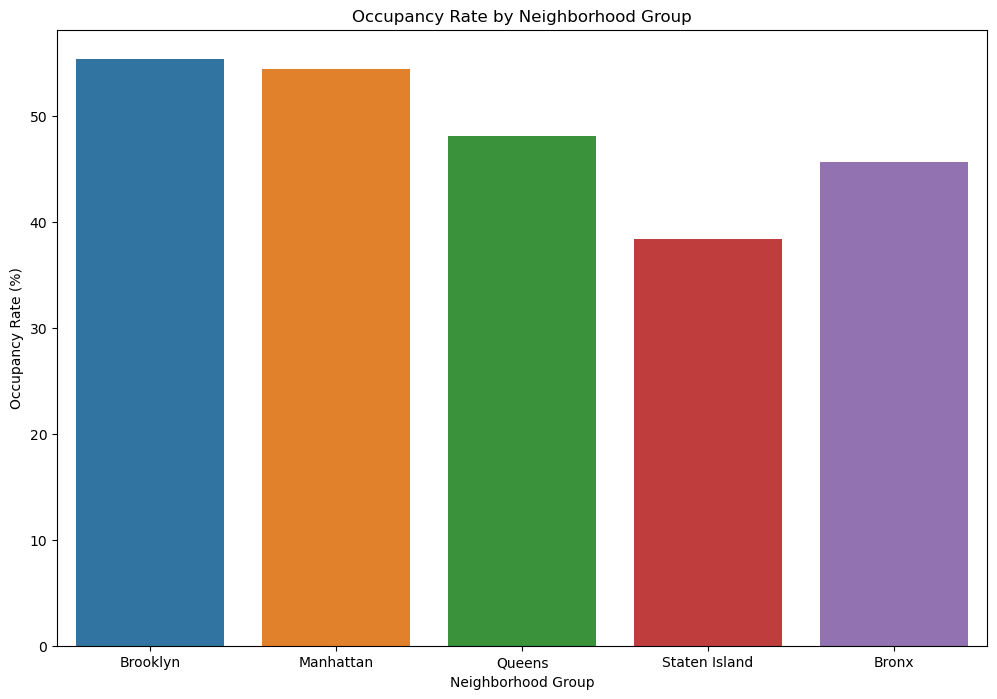

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated Airbnb dataset
updated_file_path = "/Users/detviler/Downloads/Data Analytics Project/updated_NY_AirBNB_2019.xls"
df_updated = pd.read_excel(updated_file_path)

# Create a bar plot to compare occupancy rates across neighborhood groups
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood_group', y='Occupancy_Rate', data=df_updated, ci=None)
plt.title('Occupancy Rate by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Occupancy Rate (%)')
plt.show()


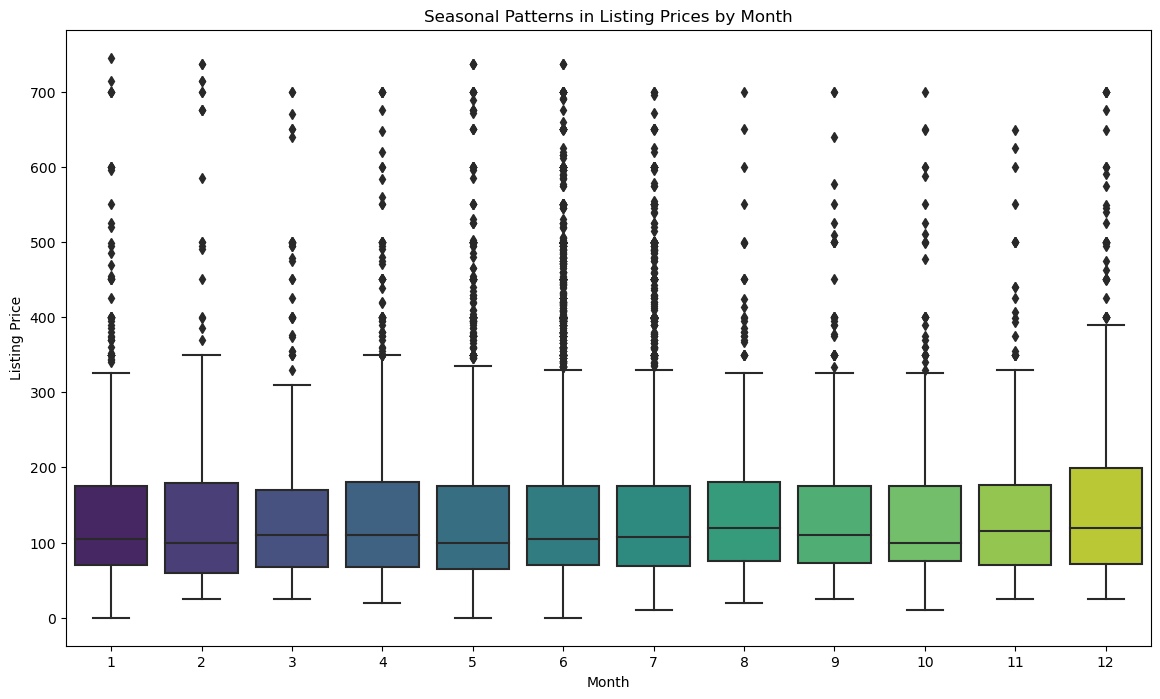

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated Airbnb dataset
updated_file_path = "/Users/detviler/Downloads/Data Analytics Project/updated_NY_AirBNB_2019.xls"
df_updated = pd.read_excel(updated_file_path)

# Convert 'last_review' to datetime format
df_updated['last_review'] = pd.to_datetime(df_updated['last_review'])

# Extract month and year from the 'last_review' column
df_updated['review_month'] = df_updated['last_review'].dt.month
df_updated['review_year'] = df_updated['last_review'].dt.year

# Create a box plot to show seasonal patterns in listing prices
plt.figure(figsize=(14, 8))
sns.boxplot(x='review_month', y='price', data=df_updated, palette='viridis')
plt.title('Seasonal Patterns in Listing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Listing Price')
plt.show()


## Monthly Average Listing Prices:

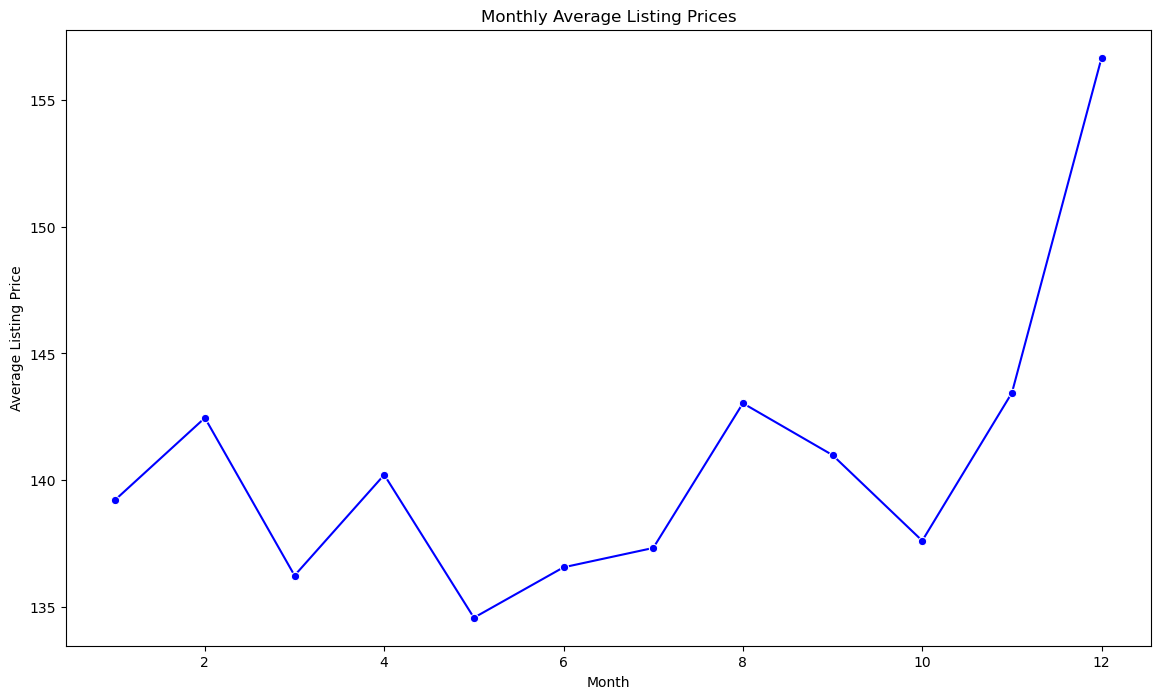

In [9]:
# Calculate the monthly average listing prices
monthly_avg_prices = df_updated.groupby('review_month')['price'].mean().reset_index(name='average_price')

# Create a line plot for monthly average listing prices
plt.figure(figsize=(14, 8))
sns.lineplot(x='review_month', y='average_price', data=monthly_avg_prices, marker='o', color='b')
plt.title('Monthly Average Listing Prices')
plt.xlabel('Month')
plt.ylabel('Average Listing Price')
plt.show()


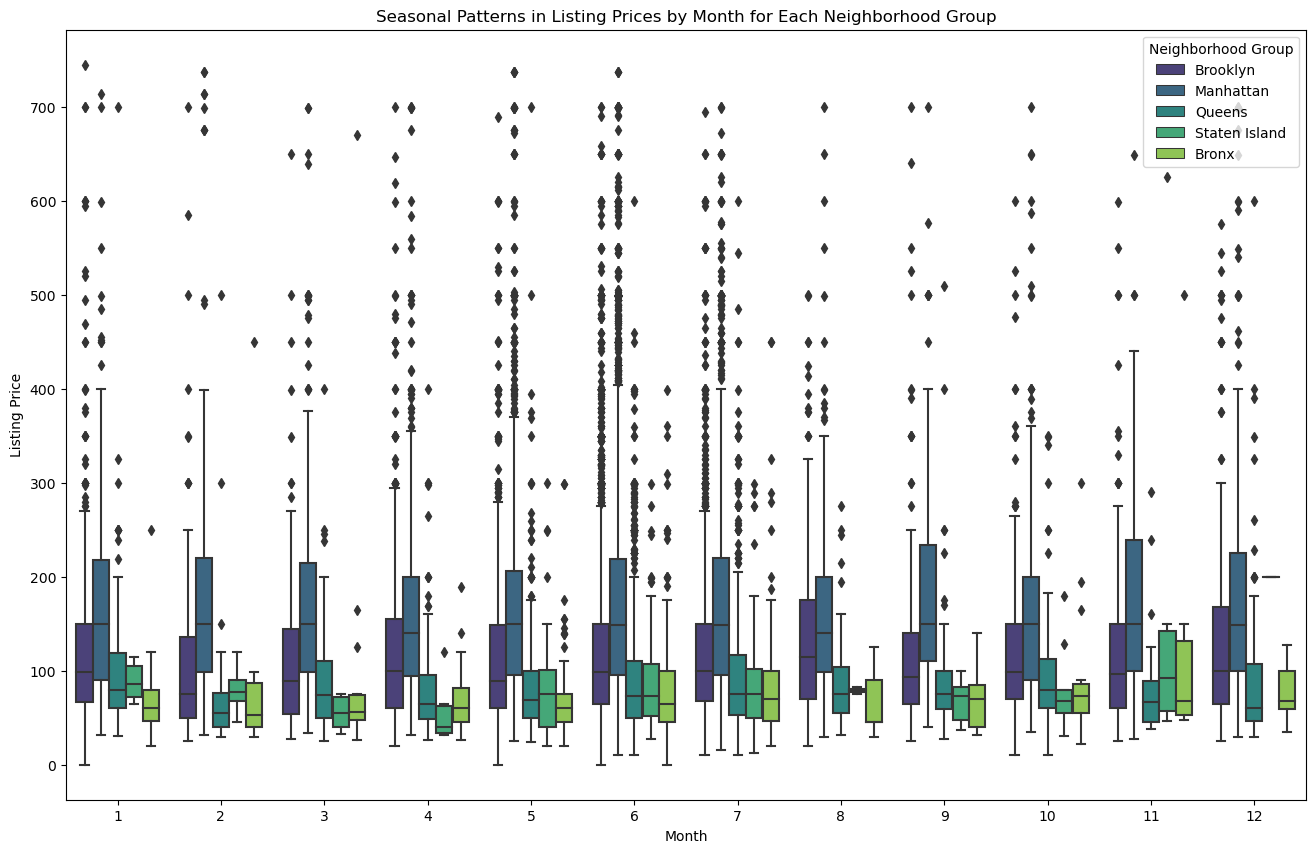

In [10]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='review_month', y='price', hue='neighbourhood_group', data=df_updated, palette='viridis')
plt.title('Seasonal Patterns in Listing Prices by Month for Each Neighborhood Group')
plt.xlabel('Month')
plt.ylabel('Listing Price')
plt.legend(title='Neighborhood Group')
plt.show()

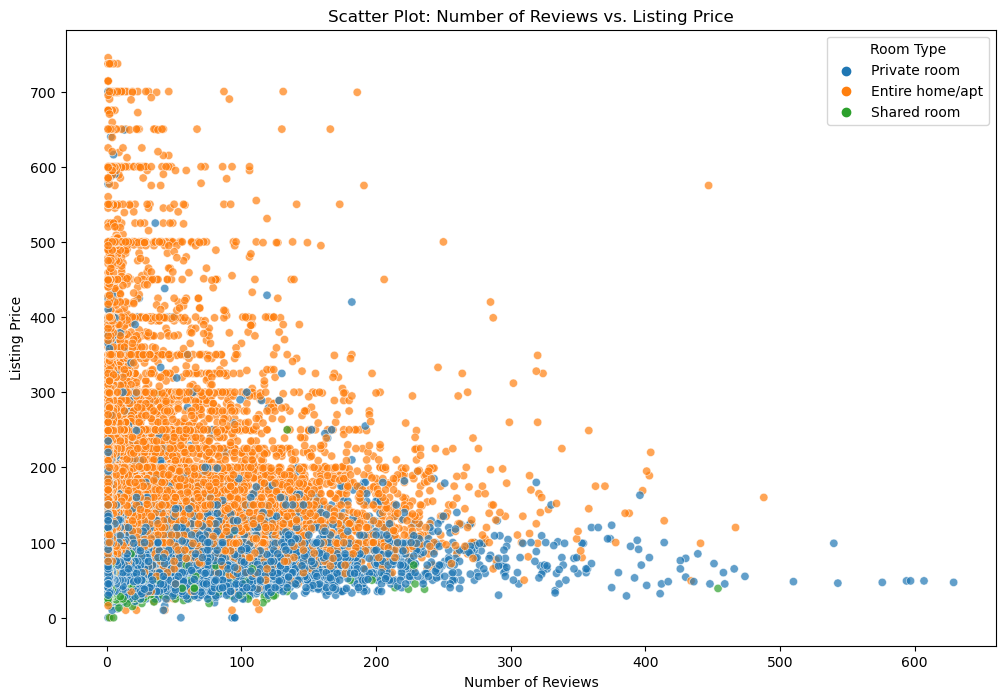

In [2]:
import pandas as pd  # Import the pandas library

# Load the updated Airbnb dataset
updated_file_path = "/Users/detviler/Downloads/Data Analytics Project/updated_NY_AirBNB_2019.xls"
df_updated = pd.read_excel(updated_file_path)

# Create a scatter plot for the number of reviews vs. listing price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='number_of_reviews', y='price', hue='room_type', data=df_updated, alpha=0.7)
plt.title('Scatter Plot: Number of Reviews vs. Listing Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Listing Price')
plt.legend(title='Room Type')
plt.show()


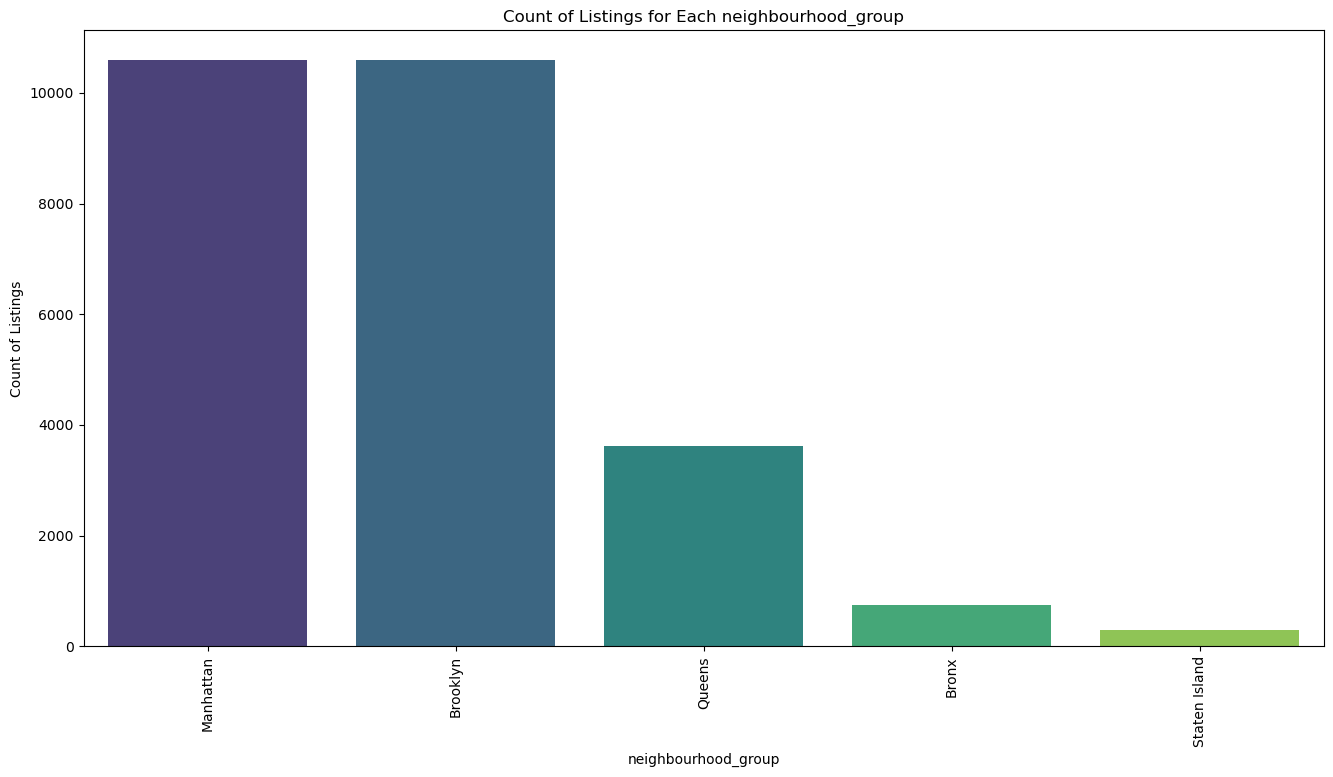

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated Airbnb dataset
updated_file_path = "/Users/detviler/Downloads/Data Analytics Project/updated_NY_AirBNB_2019.xls"
df_updated = pd.read_excel(updated_file_path)

# Create a bar plot for the count of listings in each neighborhood
plt.figure(figsize=(16, 8))
sns.countplot(x='neighbourhood_group', data=df_updated, palette='viridis', order=df_updated['neighbourhood_group'].value_counts().index)
plt.title('Count of Listings for Each neighbourhood_group')
plt.xlabel('neighbourhood_group')
plt.ylabel('Count of Listings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()
